In [2]:
import numpy as np
import pandas as pd
import os

In [3]:
HOME = os.getenv('HOME')

In [4]:
fp = '%s/DATA/Beaching_Project/Census/Global_census_6_species/obis_seamap_species_180438_points_csv.csv' % HOME
df = pd.read_csv(fp)

In [6]:
df.scientific.value_counts()

Delphinus delphis    24567
Name: scientific, dtype: int64

In [13]:
df[['row_id', 'depth','count','scientific', 'common','date_time', 'datetime_end_utc']].head()

,row_id,depth,count,scientific,common,date_time,datetime_end_utc
0,1423_28,NaN,500.0,Delphinus delphis,saddle-backed dolphin,2011-02-15 15:00:09,NaN
1,1423_21,NaN,500.0,Delphinus delphis,saddle-backed dolphin,2011-02-15 13:24:04,NaN
2,1423_13,NaN,20.0,Delphinus delphis,saddle-backed dolphin,2011-02-15 09:54:30,NaN
3,1423_12,NaN,25.0,Delphinus delphis,saddle-backed dolphin,2011-02-15 09:33:12,NaN
4,1423_66,NaN,1800.0,Delphinus delphis,saddle-backed dolphin,2011-02-17 14:14:53,NaN


In [14]:
dfSmall = df[['row_id', 'latitude', 'longitude', 'date_time', 'count', 'scientific','common']]

In [17]:
dfSmall.index = pd.DatetimeIndex(dfSmall.date_time)

In [18]:
dfSmall.head()

,row_id,latitude,longitude,date_time,count,scientific,common
date_time,,,,,,,
2011-02-15 15:00:09,1423_28,33.072167,-117.435000,2011-02-15 15:00:09,500.0,Delphinus delphis,saddle-backed dolphin
2011-02-15 13:24:04,1423_21,32.924333,-117.401500,2011-02-15 13:24:04,500.0,Delphinus delphis,saddle-backed dolphin
2011-02-15 09:54:30,1423_13,32.661167,-117.676333,2011-02-15 09:54:30,20.0,Delphinus delphis,saddle-backed dolphin
2011-02-15 09:33:12,1423_12,32.669667,-117.640500,2011-02-15 09:33:12,25.0,Delphinus delphis,saddle-backed dolphin
2011-02-17 14:14:53,1423_66,33.358667,-117.810167,2011-02-17 14:14:53,1800.0,Delphinus delphis,saddle-backed dolphin


In [19]:
dfSmall.to_pickle('../PklJar/dfDdelphis_census_global.pkl')

In [20]:
capecodlonlat=(-71,-69,40,43)
dfcensusCapeCod = dfSmall.loc[(dfSmall.longitude>capecodlonlat[0])&(dfSmall.longitude<capecodlonlat[1]) & 
            (dfSmall.latitude>capecodlonlat[2]) & (dfSmall.latitude<capecodlonlat[3]),:]

In [21]:
dfcensusCapeCod.sort_index(inplace=True)

/home/madhatter106/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [22]:
dfcensusCapeCod.head()

,row_id,latitude,longitude,date_time,count,scientific,common
date_time,,,,,,,
1974-05-06 05:08:00,284_14945,40.167,-70.367,1974-05-06 05:08:00,5.0,Delphinus delphis,Short-beaked Common Dolphin
1975-03-18 17:50:00,284_15071,40.083,-70.317,1975-03-18 17:50:00,4.0,Delphinus delphis,Short-beaked Common Dolphin
1975-03-18 18:15:00,284_15072,40.067,-70.250,1975-03-18 18:15:00,4.0,Delphinus delphis,Short-beaked Common Dolphin
1976-04-30 00:00:00,284_12246,42.200,-70.133,1976-04-30 00:00:00,45.0,Delphinus delphis,Short-beaked Common Dolphin
1976-05-13 00:00:00,284_12285,42.950,-69.217,1976-05-13 00:00:00,5.0,Delphinus delphis,Short-beaked Common Dolphin


In [23]:
dfcensusCapeCod.to_pickle('../PklJar/dfDdelphis_census_capecod_all_years.pkl')

In [28]:
dfCensusCapeCod = dfcensusCapeCod.loc[dfcensusCapeCod.index.year >=1999]

In [29]:
dfCensusCapeCod.head()

,row_id,latitude,longitude,date_time,count,scientific,common
date_time,,,,,,,
2000-05-03 15:15:56,513_2395,41.797333,-69.523667,2000-05-03 15:15:56,5.0,Delphinus delphis,saddle-backed dolphin
2001-05-02 13:17:15,513_3367,40.703000,-69.003667,2001-05-02 13:17:15,5.0,Delphinus delphis,saddle-backed dolphin
2001-06-05 13:30:45,513_79635,40.416833,-70.862667,2001-06-05 13:30:45,30.0,Delphinus delphis,saddle-backed dolphin
2002-04-17 13:18:23,513_3984,41.365466,-69.082698,2002-04-17 13:18:23,7.0,Delphinus delphis,saddle-backed dolphin
2002-04-17 15:57:23,513_82601,41.484599,-69.465530,2002-04-17 15:57:23,4.0,Delphinus delphis,saddle-backed dolphin


In [33]:
dfCensusCapeCodDaily = dfCensusCapeCod.resample('D').sum()

In [30]:
idx = pd.date_range('1999-01-01', '2014-12-31')

In [31]:
dfCCC = pd.DataFrame(index=idx)

In [35]:
dfCCC = dfCCC.merge(dfCensusCapeCodDaily, how='outer', left_index=True, right_index=True)

In [37]:
dfCCC.drop(['latitude','longitude'], axis=1, inplace=True)

In [39]:
dfCCC.meta = {'scientific': 'Delphinus delphis', 'common': 'saddle-backed dolphin'}

In [45]:
dfCCC.replace(np.NaN, 0, inplace=True)

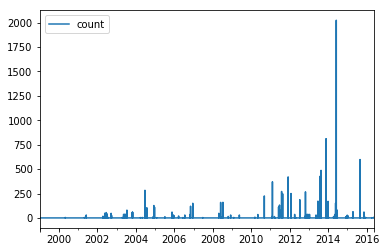

In [46]:
% matplotlib inline
dfCCC.plot()

In [47]:
dfCCC['count'].min(), dfCCC['count'].max()

(0.0, 2025.0)

In [48]:
dfCCC.to_pickle('../PklJar/dfDdelphis_census_capecod_1999_2014.pkl')